In [1]:
def residual_net(x):    
    conv1 = tf.layers.conv2d(inputs = x,                             
                             filters = 32, 
                             kernel_size = [3, 3], 
                             padding = "SAME", 
                             activation = tf.nn.relu)
    conv2 = tf.layers.conv2d(inputs = conv1, 
                             filters = 32, 
                             kernel_size = [3, 3], 
                             padding = "SAME", 
                             activation = tf.nn.relu)
    
    maxp2 = tf.layers.max_pooling2d(inputs = x + conv2, 
                                    pool_size = [2, 2], 
                                    strides = 2)

    flat = tf.layers.flatten(maxp2)    
    hidden = tf.layers.dense(inputs = flat, 
                             units = n_hidden, 
                             activation = tf.nn.relu)
    output = tf.layers.dense(inputs = hidden, 
                             units = n_output)
    
    return output

In [2]:
import sys
sys.executable

'/usr/bin/python3'

In [3]:
from keras import applications

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# model_type = applications.densenet
# model_type = applications.inception_resnet_v2
# model_type = applications.inception_v3
model_type = applications.mobilenet
# model_type = applications.mobilenet_v2
# model_type = applications.nasnet
# model_type = applications.resnet50
# model_type = applications.vgg16
# model_type = applications.vgg19

In [5]:
model = model_type.MobileNet() # Change Model (hint : use capital name)

model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


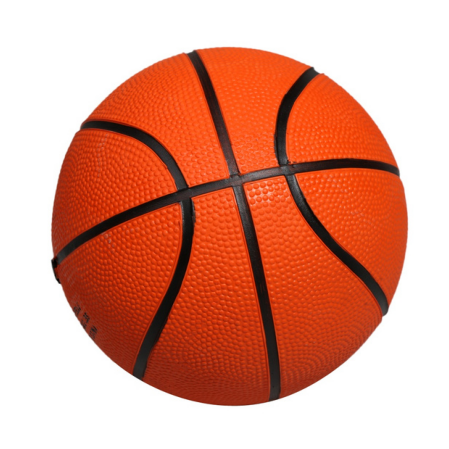

In [9]:
import cv2
from skimage import io

#img = cv2.imread('/content/drive/My Drive/Colab Notebooks/data_files/ILSVRC2017_test_00000005.jpeg')

img = io.imread('https://canary.contestimg.wish.com/api/webimage/5aa7d3918fdae469ff40475d-large.jpg?cache_buster=a9da5a7c7b31c77bff8e30820ad270c9')

plt.figure(figsize = (10,8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
resize_img = cv2.resize(img, (224, 224)).reshape(1, 224, 224, 3)
input_img = model_type.preprocess_input(resize_img)
yhat = model.predict(input_img)
label = model_type.decode_predictions(yhat)[0]

print('%s (%.2f%%)\n' % (label[0][1], label[0][2]*100))
print('%s (%.2f%%)\n' % (label[1][1], label[1][2]*100))
print('%s (%.2f%%)\n' % (label[2][1], label[2][2]*100))
print('%s (%.2f%%)\n' % (label[3][1], label[3][2]*100))
print('%s (%.2f%%)\n' % (label[4][1], label[4][2]*100))

basketball (99.99%)

lampshade (0.00%)

umbrella (0.00%)

orange (0.00%)

balloon (0.00%)

